#                                     Online Payments Fraud Detection 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Arman Khan\OneDrive\Desktop\Project\onlinefraud.csv")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
data.shape

(6362620, 11)

In [5]:
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [6]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: xlabel='type', ylabel='count'>

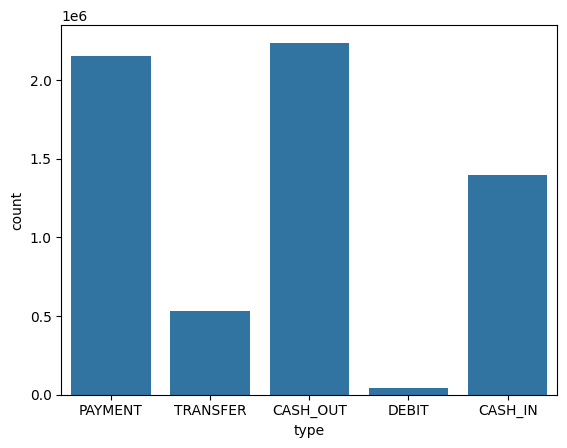

In [9]:
sns.countplot(data, x='type')

<Axes: xlabel='type', ylabel='count'>

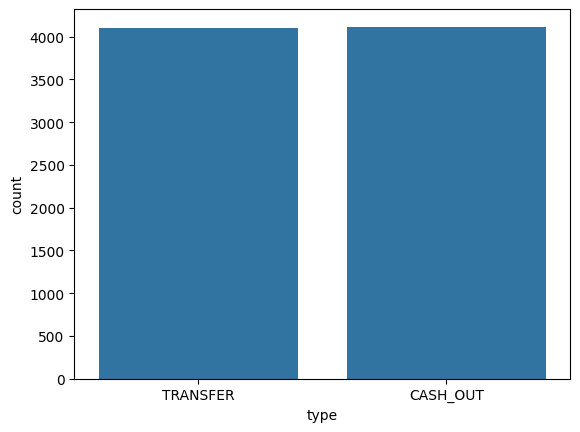

In [10]:
sns.countplot(data[data['isFraud']==1], x='type')

Text(0.5, 0, 'amount')

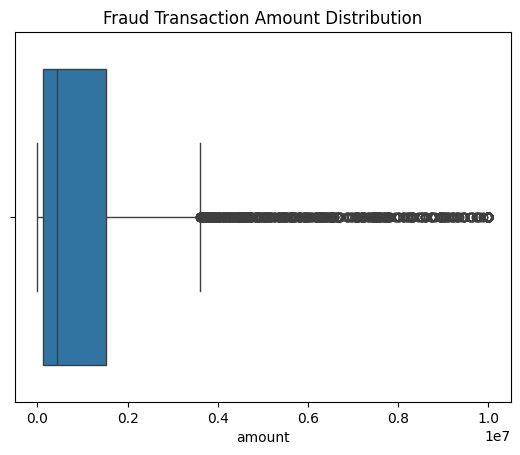

In [11]:
sns.boxplot(data[data['isFraud']==1]["amount"].values, orient='h')
plt.title('Fraud Transaction Amount Distribution')
plt.xlabel('amount')

<Axes: xlabel='hour', ylabel='count'>

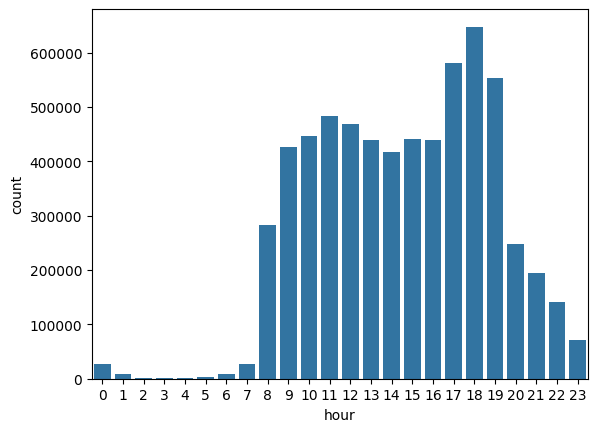

In [12]:
data['hour'] = (data['step'] - 1) % 24
sns.countplot(data, x='hour')

In [13]:
# Dropping columns that are not needed
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [14]:
# Applying encoding on type column
df_enc = pd.get_dummies(data, columns = ['type'])
df_enc

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,22,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,22,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,22,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,22,False,False,False,False,True


In [15]:
X = df_enc.drop('isFraud', axis = 1)
y = df_enc['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3, random_state = 42)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [17]:
from sklearn.utils import resample
import pandas as pd

# Combine features and target for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data['isFraud'] == 0]  
minority = train_data[train_data['isFraud'] == 1]  

if minority.empty:
    print("Minority class samples are not present in the dataset.")
else:
    # Upsample minority class
    minority_upsampled = resample(minority, 
                                  replace=True, 
                                  n_samples=len(majority), 
                                  random_state=42)
    
    # Combine majority and upsampled minority
    train_data_balanced = pd.concat([majority, minority_upsampled])
    
    # Separate back into features and target
    X_train = train_data_balanced.drop('isFraud', axis=1)
    y_train = train_data_balanced['isFraud']


In [18]:
import numpy as np


synthetic_samples = np.random.random((5, X_train.shape[1]))  
synthetic_labels = np.ones(5)  


X_train = np.vstack([X_train, synthetic_samples])
y_train = np.hstack([y_train, synthetic_labels])


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10)
lr.fit(X_train, y_train)  
y_lr_pred = lr.predict(X_test)
print('LogisticRegression')
print(classification_report(y_test, y_lr_pred))


C:\Users\Arman Khan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Arman Khan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.70      0.82   4448063
           1       0.00      0.96      0.01      5771

    accuracy                           0.70   4453834
   macro avg       0.50      0.83      0.42   4453834
weighted avg       1.00      0.70      0.82   4453834



In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 3,random_state=0)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
print('DecisionTreeClassifier')
print(classification_report(y_test, y_dt_pred))

C:\Users\Arman Khan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   4448063
           1       0.03      0.90      0.05      5771

    accuracy                           0.96   4453834
   macro avg       0.51      0.93      0.51   4453834
weighted avg       1.00      0.96      0.98   4453834



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print('RandomForestClassifier')
print(classification_report(y_test, y_rf_pred))

C:\Users\Arman Khan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   4448063
           1       0.02      0.94      0.05      5771

    accuracy                           0.95   4453834
   macro avg       0.51      0.94      0.51   4453834
weighted avg       1.00      0.95      0.97   4453834



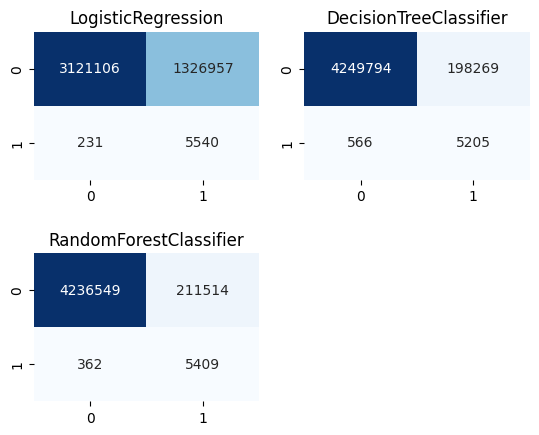

In [22]:
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('DecisionTreeClassifier')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')
plt.subplots_adjust(hspace=0.5)

In [23]:
import pickle


with open(r"C:\Users\Arman Khan\OneDrive\Desktop\Project\onlinefraud.csv","wb") as model_file:
    pickle.dump(rf, model_file)